In [ ]:
# metamarkers

In [2]:
library(data.table)
library(dplyr)
library(ggplot2)
library(MetaMarkers)
library(ggtern)

In [3]:
# marker ranks for all genes, FC threshold >= 1.5
meta_markers = read.delim('N1N2_metamarkers.csv', sep = ',')
meta_markers[1:2,]

group cell_type        rank gene    recurrence auroc     fold_change
1 all   Neurog1_positive 1    Neurog1 2          0.7905886 3.204188   
2 all   Neurog1_positive 2    Hbb-y   2          0.5862988 1.829389   
  fold_change_detection expression precision recall    population_size
1 4.588822               701.8345  0.2705065 1.0000000 2969.333       
2 1.340543              2555.0735  0.1182218 0.6676541 2453.500       
  n_datasets govek hamed la_manno
1 3          TRUE  FALSE TRUE    
2 2          TRUE     NA TRUE

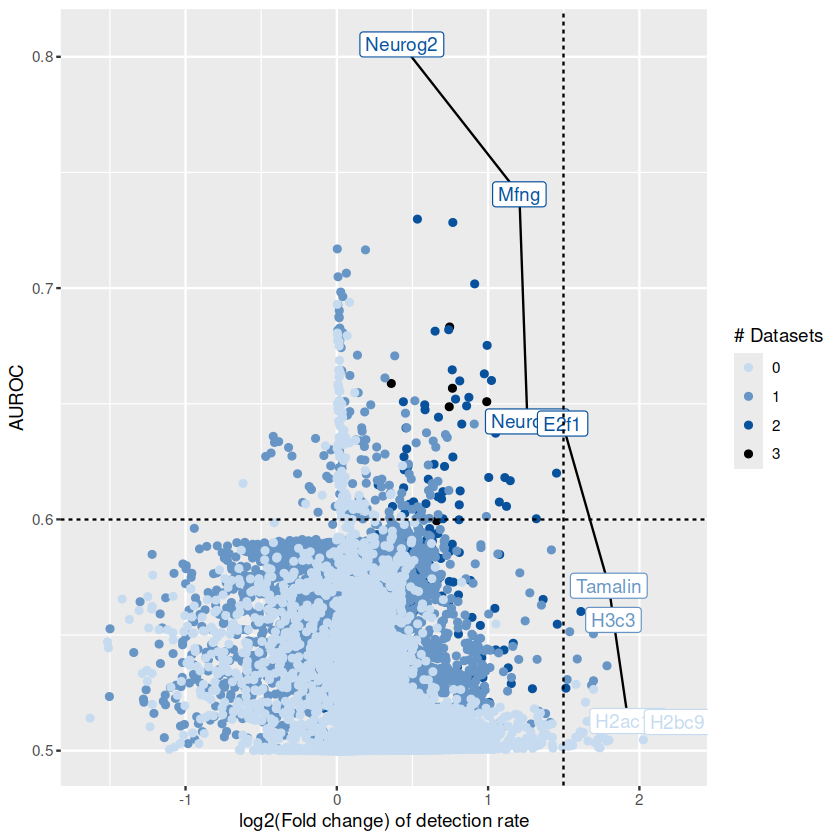

In [4]:
plotdf = meta_markers[meta_markers$gene!='Neurog1',]
plot_pareto_markers(plotdf, "double_positive", min_recurrence = 0, fc_threshold = 1.5, auroc_threshold = 0.6)

In [5]:
# dfs for each cell type
tab1 = meta_markers[meta_markers$cell_type=='double_positive',]
tab2 = meta_markers[meta_markers$cell_type=='Neurog2_positive',]
tab3 = meta_markers[meta_markers$cell_type=='Neurog1_positive',]

head(tab1, n = 20)

group cell_type       rank gene    recurrence auroc     fold_change
67061 all   double_positive  1   Neurog1 3          0.9016972 22.820055  
67062 all   double_positive  2   Btg2    3          0.6831898  5.098237  
67063 all   double_positive  3   Vim     3          0.6587578 12.843833  
67064 all   double_positive  4   Ccnd1   3          0.6566928  4.995269  
67065 all   double_positive  5   Dbx1    3          0.6508801  4.973871  
67066 all   double_positive  6   Nuak2   3          0.6486897  7.505135  
67067 all   double_positive  7   Baz1a   3          0.5993917  3.820364  
67068 all   double_positive  8   Igsf8   3          0.5959443  3.736307  
67069 all   double_positive  9   Cald1   3          0.5909443  3.529216  
67070 all   double_positive 10   Sdk2    3          0.5697753 14.846323  
67071 all   double_positive 11   Neurog2 2          0.8053398        NA  
67072 all   double_positive 12   Mfng    2          0.7405371  2.849592  
67073 all   double_positive 13   Hes6    2          0.7298140        NA  
67074 all   double_positive 14   Gadd45g 2          0.7283653        NA  
67075 all   double_positive 15   Tead2   2          0.7018095  2.102209  
67076 all   double_positive 16   Fam110a 2          0.6819882  2.282996  
67077 all   double_positive 17   Srrm4   2          0.6813778        NA  
67078 all   double_positive 18   Spsb4   2          0.6752266  2.333279  
67079 all   double_positive 19   Btbd17  2          0.6646519        NA  
67080 all   double_positive 20   Zc3h12c 2          0.6629291  2.380259  
      fold_change_detection expression precision recall    population_size
67061 7.274393              1052.6162  0.6924245 1.0000000 9487.0         
67062 1.676888              1102.6085  0.3823258 0.7492617 9487.0         
67063 1.283522              3006.6657  0.3504490 0.8155888 9487.0         
67064 1.698524              1526.1737  0.3779666 0.6403706 9487.0         
67065 1.987784               551.6110  0.4043778 0.5128384 9487.0         
67066 1.673821               564.1695  0.3833298 0.5844429 9487.0         
67067 1.579635               582.8264  0.3689825 0.4872708 9487.0         
67068 1.367999                     NA  0.3580618 0.5693150 9487.0         
67069 1.347791               791.3724  0.3557426 0.5913380 9487.0         
67070 1.554398               303.6810  0.3699057 0.4090216 9487.0         
67071 1.346958              2797.0875  0.3678525 1.0000000 9487.0         
67072 2.307909               311.0110  0.2109585 0.7670831 3359.5         
67073 1.446705              2340.2515  0.3707445 0.7899189 9487.0         
67074 1.701497              2939.8309  0.3870520 0.8014828 9487.0         
67075 1.880750               308.1305  0.1767145 0.8134888 3359.5         
67076 1.669679               315.7683  0.1671552 0.7230971 3359.5         
67077 1.568699              1908.7860  0.3784931 0.7587794 9487.0         
67078 1.991094               203.4047  0.1913119 0.6429512 3359.5         
67079 1.696909              1152.4665  0.3833330 0.6802130 9487.0         
67080 1.965779               197.4681  0.2007991 0.6115419 3359.5         
      n_datasets govek hamed la_manno
67061 3          TRUE   TRUE TRUE    
67062 3          TRUE   TRUE TRUE    
67063 3          TRUE   TRUE TRUE    
67064 3          TRUE   TRUE TRUE    
67065 3          TRUE   TRUE TRUE    
67066 3          TRUE   TRUE TRUE    
67067 3          TRUE   TRUE TRUE    
67068 3          TRUE   TRUE TRUE    
67069 3          TRUE   TRUE TRUE    
67070 3          TRUE   TRUE TRUE    
67071 3          TRUE  FALSE TRUE    
67072 2          TRUE     NA TRUE    
67073 3          TRUE  FALSE TRUE    
67074 3          TRUE  FALSE TRUE    
67075 2          TRUE     NA TRUE    
67076 2          TRUE     NA TRUE    
67077 3          TRUE  FALSE TRUE    
67078 2          TRUE     NA TRUE    
67079 3          TRUE  FALSE TRUE    
67080 2          TRUE     NA TRUE

In [6]:
# for z-score of ranks --- heatmap
glist = unique(meta_markers$gene)
df = read.delim('N1N2_marker_zscores.csv', sep = ',')
df[1:2,]

gene    N1N2_rank N2_rank N1_rank double_positive Neurog2_positive
1 Neurog1    1      33530   1       50.00000        0.000000        
2 Hbb-y   2617      32621   2       47.30375        1.390972        
  Neurog1_positive N1N2_zscore N2_zscore N1_zscore 
1 50.00000         -0.5773503  1.154701  -0.5773503
2 51.30528         -0.5037078  1.151692  -0.6479843

In [16]:
# for z-score of ranks --- heatmap
# genes in 2 or more datasets, auroc > 0.55
allgenes = unique(meta_markers$gene)
glist = unique(meta_markers$gene[meta_markers$recurrence>=2 | meta_markers$auroc>0.55])
length(glist)

df = data.frame(gene = glist, N1N2_rank = tab1$rank[match(glist, tab1$gene)],
                N2_rank = tab2$rank[match(glist, tab2$gene)], N1_rank = tab3$rank[match(glist, tab3$gene)])

df$double_positive = 100 - (df$N1N2_rank*100/length(allgenes))
df$Neurog2_positive = 100 - (df$N2_rank*100/length(allgenes))
df$Neurog1_positive = 100 - (df$N1_rank*100/length(allgenes))

rsum = rowSums(df[,5:7], na.rm = T)

# scale for composition plot
df[,5] <- df[,5]*100/rsum
df[,6] <- df[,6]*100/rsum
df[,7] <- df[,7]*100/rsum
df[1:2,]

[1] 3057

gene    N1N2_rank N2_rank N1_rank double_positive Neurog2_positive
1 Neurog1    1      33530   1       50.00000        0.000000        
2 Hbb-y   2617      32621   2       47.30375        1.390972        
  Neurog1_positive
1 50.00000        
2 51.30528

In [17]:
# colors for plotting old and new target genes?
set1 = c('Nhlh2', 'Eomes', 'Sox2', 'Neurod2', 'Bcl11b', 'Sox9', 'Hes1', 'Dll1')
set2 = c('Igsf8', 'Hes6', 'Srrm4', 'Igfbp2', 'Tfap2c', 'Rhbdl3', 'Sstr2', 'Otx1', 'Wnt5a')

df$mycol = 'others'
df$mycol[match(set1, df$gene)] = 'old'
df$mycol[match(set2, df$gene)] = 'new'

df2 = rbind(df[df$mycol=='others',], df[df$mycol=='old',], df[df$mycol=='new',])

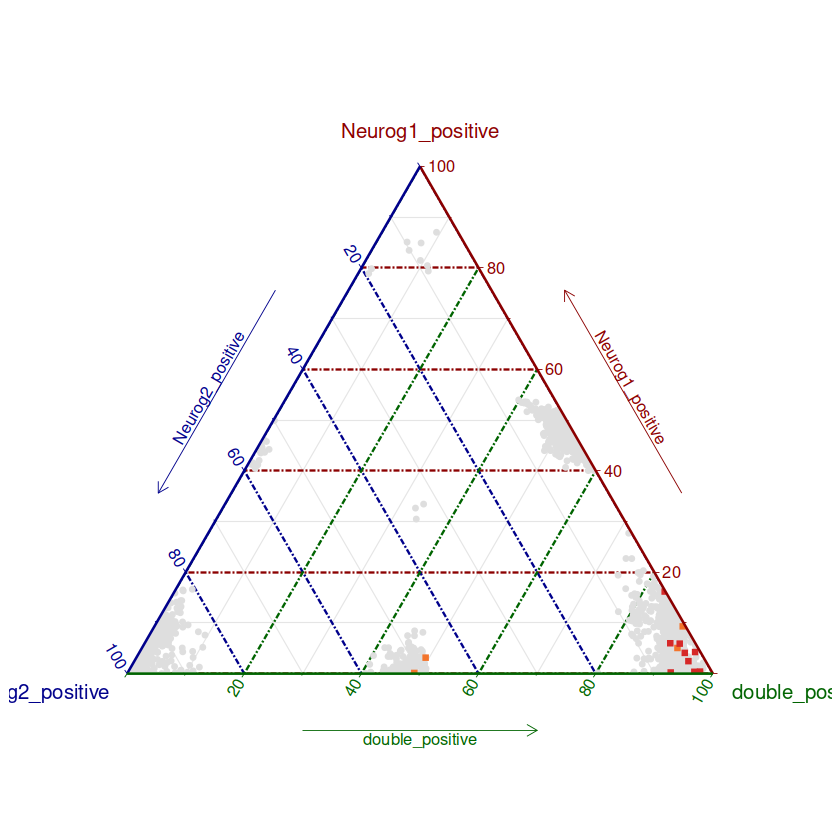

In [20]:
# pdf('aa-n1n2-ternary.pdf', width = 6, height = 5)
ggtern(df2, aes(Neurog2_positive, Neurog1_positive, double_positive, col = mycol)) +
geom_point(alpha = 1, size = 1.5, aes(shape = mycol)) + theme_rgbw() + 
scale_color_manual(values = c('#d62828', '#f3742b', '#dedede')) +
scale_shape_manual(values = c(15, 15, 20)) + theme(legend.position = 'none')
# dev.off()

In [22]:
# add recurrence in dbl-pos to df
df$recurrence_dbl_pos = tab1$recurrence[match(df$gene, tab1$gene)]
df[1:2,]

gene    N1N2_rank N2_rank N1_rank double_positive Neurog2_positive
1 Neurog1    1      33530   1       50.00000        0.000000        
2 Hbb-y   2617      32621   2       47.30375        1.390972        
  Neurog1_positive mycol  recurrence_dbl_pos
1 50.00000         others 3                 
2 51.30528         others 0

In [25]:
df3 = df %>% arrange(-recurrence_dbl_pos, -double_positive)
head(df3)

gene  N1N2_rank N2_rank N1_rank double_positive Neurog2_positive
1 Igsf8 8         30967   33447   92.68414        7.0863747       
2 Nuak2 6         33343   30734   91.82896        0.5122305       
3 Baz1a 7         32406    5989   53.90590        1.8074227       
4 Vim   3         32917    4699   53.24197        0.9734640       
5 Cald1 9         32307    2742   51.15211        1.8662638       
6 Btg2  2         33179     598   50.18335        0.5253626       
  Neurog1_positive mycol  recurrence_dbl_pos
1  0.2294846       new    3                 
2  7.6588052       others 3                 
3 44.2866791       others 3                 
4 45.7845675       others 3                 
5 46.9816273       others 3                 
6 49.2912844       others 3

In [26]:
# save
write.table(df3, file = 'N1N2_genes_by_recurrence.csv', sep = ',', 
            row.names = F, col.names = T, quote = F)

In [1]:
df3 = read.delim('N1N2_genes_by_recurrence.csv', sep = ',')

In [3]:
length(df3$gene[df3$recurrence_dbl_pos>=2 & df3$double_positive>=80])
length(df3$gene[df3$recurrence_dbl_pos>=3])
length(df3$gene[df3$recurrence_dbl_pos>=3 & df3$double_positive>=80])

[1] 47

[1] 10

[1] 2

In [4]:
df3$gene[df3$recurrence_dbl_pos>=2 & df3$double_positive>=80]
df3$gene[df3$recurrence_dbl_pos>=3]

[1] "Igsf8"    "Nuak2"    "Tfap2c"   "Sstr2"    "Insm1"    "Eml5"    
 [7] "Dmrta2"   "Srrm4"    "Otx1"     "Neurog2"  "Abracl"   "Synpr"   
[13] "Igfbp2"   "Magi1"    "Itga4"    "Wnt5a"    "Igdcc4"   "Gm42047" 
[19] "Cdca7"    "Aim2"     "Dll1"     "Myo10"    "Rhbdl3"   "Mylip"   
[25] "Gem"      "Nkd1"     "Ly6e"     "Tgif1"    "Gsta4"    "Ackr3"   
[31] "Dusp10"   "Ifitm2"   "Txnip"    "Arhgap31" "Hk2"      "Sapcd2"  
[37] "Fbxl7"    "Gprc5b"   "Abcd2"    "Barhl2"   "Psrc1"    "Cflar"   
[43] "Zc3h12c"  "Hes6"     "Spon1"    "Miat"     "Gm13889"

[1] "Igsf8"   "Nuak2"   "Baz1a"   "Vim"     "Cald1"   "Btg2"    "Dbx1"   
 [8] "Neurog1" "Ccnd1"   "Sdk2"